In [5]:
import numpy as np

def LeastSquares(Q,R,b):
    m = np.shape(Q)[0]
    n = np.shape(Q)[1]
    z = np.dot(np.transpose(R),np.dot(np.transpose(Q),b))
    y = np.zeros(n)
    y[0] = z[0]/R[0,0]
    for i in range(1,n):
        y[i] = z[i]
        for j in range(i):
            y[i] = y[i] - R[j,i]*y[j]
        y[i] /= R[i,i]
    x = np.zeros(n)
    x[n-1] = y[n-1]/R[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] = x[i] - R[i,j]*x[j]
        x[i] /= R[i,i]
    return x

def QRsolve(Q,R,b):
    n = len(A)
    x = np.zeros(n)
    y = np.dot(np.transpose(Q),b)
    x[n-1] = y[n-1]/R[n-1,n-1]
    for i in range(n-2,-1,-1):
        x[i] = y[i]
        for j in range(i+1,n):
            x[i] = x[i] - R[i,j]*x[j]
        x[i] /= R[i,i]
    return x

def QRdecomp(A):
    m = np.shape(A)[0]
    n = np.shape(A)[1]
    Q = np.zeros((m,n))
    R = np.zeros((n,n))
    u = np.zeros(m)
    q = np.zeros(m)
    for i in range(m):
        u[i] = A[i,0]
    v = np.copy(u)
    v = v/np.linalg.norm(v)
    for i in range(m):
        Q[i,0] = v[i]
    for j in range(1,n):
        for i in range(m):
            u[i] = A[i,j]
        v = np.copy(u)
        for k in range(j-1,-1,-1):
            for i in range(m):
                q[i] = Q[i,k]
            v = v - np.dot(u,q) * q
        v = v/np.linalg.norm(v)
        for i in range(m):
            Q[i,j] = v[i]
    for i in range(n):
        for j in range(n):
            R[i,j] = 0.0
            if (j >= i):
                for k in range(m):
                    R[i,j] = R[i,j] + A[k,j] * Q[k,i]
    return Q,R

A = np.matrix([[1.0,-1.0,1.0],[1.0,0.0,0.0],[1.0,1.0,1.0]])
print(A)
Q,R = QRdecomp(A)
print(Q)
print(R)
print(np.dot(Q,R))

b = np.array([1.0,0.0,1.0])
print(b)
x = QRsolve(Q,R,b)
print(x)




[[ 1. -1.  1.]
 [ 1.  0.  0.]
 [ 1.  1.  1.]]
[[ 0.57735027 -0.70710678  0.40824829]
 [ 0.57735027  0.         -0.81649658]
 [ 0.57735027  0.70710678  0.40824829]]
[[ 1.73205081  0.          1.15470054]
 [ 0.          1.41421356  0.        ]
 [ 0.          0.          0.81649658]]
[[  1.00000000e+00  -1.00000000e+00   1.00000000e+00]
 [  1.00000000e+00   0.00000000e+00   3.63514589e-16]
 [  1.00000000e+00   1.00000000e+00   1.00000000e+00]]
[ 1.  0.  1.]
[ 0.  0.  1.]
[[ 1. -1.]
 [ 1.  0.]
 [ 1.  2.]]
[[ 0.57735027 -0.6172134 ]
 [ 0.57735027 -0.15430335]
 [ 0.57735027  0.77151675]]
[[ 1.73205081  0.57735027]
 [ 0.          2.1602469 ]]
[[  1.00000000e+00  -1.00000000e+00]
 [  1.00000000e+00  -5.55111512e-17]
 [  1.00000000e+00   2.00000000e+00]]
[-1.  1.  1.]
[ 1.  3.]
[ 0.14285714  0.57142857]


[[ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]]
[  3.   5.   7.  10.]
[ 25.  74.]
[ 0.5  2.3]
[ 2.8  5.1  7.4  9.7]


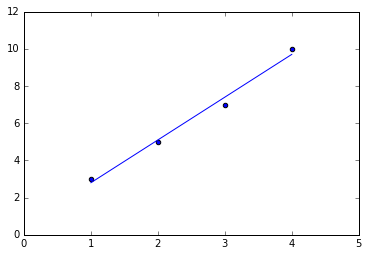

In [19]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

x = [1.0,2.0,3.0,4.0]
y = [3.0,5.0,7.0,10.0] # 10, not 9, so the fit isn't perfect

A = np.zeros((len(x),2))
for i in range(len(x)):
    A[i,0] = 1.0
    A[i,1] = x[i]
print(A)
Q,R = QRdecomp(A)

b = np.array(y)
print(b)

c = LeastSquares(Q,R,b)
print(c)

z = np.zeros(len(x))
for i in range(len(x)):
    z[i] = c[0] + c[1]*x[i]
print(z)

plt.scatter(x,y)
plt.plot(x,z)
plt.xlim(0, 5)
plt.ylim(0, 12)
plt.show()
